## MACHINE LEARNING PROJECT ##
CLASIFICACIÓN DE MONEDAS DE 2 EUROS CONMEMORATIVAS


In [178]:
import numpy as np
import pandas as pd 
import os

Localizo la ubicación de mis datos

In [179]:
root=os.getcwd()
path_fotos=root + "\\images\\SELENIUM 2EURO\\Todo\\"
filenames=os.listdir(path_fotos)


Hago un df con las fotos que he obtenido mediante WebScrapping

In [180]:
path = os.listdir(path_fotos)
coin = []

for img in path:
    
    category = img.split('0')[0]
    
    if category == "Atenas":
            coin.append("Atenas")
    elif category == "Altamira":
            coin.append("Altamira")
    elif category == "Vaticano":
            coin.append("Vaticano")
    elif category== "Francia":
            coin.append("Francia")
    
    
df = pd.DataFrame({
    'coin': path,
    'tipo': coin
}) 

Barajo las fotos

In [181]:
df=df = df.sample(frac=1).reset_index(drop=True)
df

,coin,tipo
0,Francia0 (125).jpg,Francia
1,Altamira0 (9).jpg,Altamira
2,Vaticano0 (48).jpg,Vaticano
3,Francia0 (10).jpg,Francia
4,Altamira0 (42).jpg,Altamira
...,...,...
495,Francia0 (124).jpg,Francia
496,Altamira0 (26).jpg,Altamira
497,Atenas0 (58).jpg,Atenas
498,Altamira0 (47).jpg,Altamira


Divido mis datos entre train y test, para posteriormente sacar train y validación

In [182]:
testdf=df[:int(np.floor(len(df)*0.2))]
traindf=df[int(np.floor(len(df)*0.2)):]

In [183]:
testdf.shape

(100, 2)

In [184]:
from sklearn.model_selection import train_test_split

train_df, validate_df = train_test_split(traindf,
                                         test_size=0.20,
                                         random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

Hago image Data Generator

In [185]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    shear_range = 0.1,
    zoom_range=0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1)


train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    path_fotos, 
    x_col='coin',
    y_col='tipo',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=20)

Found 320 validated image filenames belonging to 4 classes.


Saco validación

In [186]:
validation_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range = 30,
    shear_range = 0.1,
    zoom_range=0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1)
    
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    path_fotos, 
    x_col='coin',
    y_col='tipo',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=20)

Found 80 validated image filenames belonging to 4 classes.


### MODELO YA ENTRENADO ###

Determino los parámetros de mi modelo convolucional

In [251]:
from tensorflow import keras

layers = [
    keras.layers.Conv2D(64, (4,4), activation='relu', input_shape=(128,128,3)),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    
    keras.layers.Conv2D(128, (4,4), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
]


model = keras.Sequential(layers)

model.compile(optimizer = 'adam',
             loss = 'CategoricalCrossentropy',
             metrics = ['Recall'])

In [252]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(patience=9)

history = model.fit(
    train_generator,
    batch_size=20,
    epochs=50,
    callbacks=earlystop,
    validation_data = validation_generator
)

Epoch 1/50
16/16 [==============================] - 15s 837ms/step - loss: 1.5004 - recall: 0.0219 - val_loss: 1.3881 - val_recall: 0.0000e+00
Epoch 2/50
16/16 [==============================] - 13s 797ms/step - loss: 1.3846 - recall: 0.0000e+00 - val_loss: 1.3848 - val_recall: 0.0000e+00
Epoch 3/50
16/16 [==============================] - 14s 882ms/step - loss: 1.3788 - recall: 0.0031 - val_loss: 1.3999 - val_recall: 0.0125
Epoch 4/50
16/16 [==============================] - 14s 849ms/step - loss: 1.3426 - recall: 0.0125 - val_loss: 1.3857 - val_recall: 0.0000e+00
Epoch 5/50
16/16 [==============================] - 13s 812ms/step - loss: 1.3324 - recall: 0.0156 - val_loss: 1.3257 - val_recall: 0.0625
Epoch 6/50
16/16 [==============================] - 17s 1s/step - loss: 1.2814 - recall: 0.0531 - val_loss: 1.3379 - val_recall: 0.0500
Epoch 7/50
16/16 [==============================] - 17s 1s/step - loss: 1.2436 - recall: 0.0938 - val_loss: 1.2368 - val_recall: 0.1500
Epoch 8/50
16/16 

In [256]:
model.save("C:/Users/Usuario/Desktop/PROYECTO ML/Modelo_DL.h5")

Probamos con los datos de test

In [253]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    testdf, 
    path_fotos, 
    x_col='coin',
    y_col='tipo',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=20)

Found 100 validated image filenames belonging to 4 classes.


In [254]:
results = model.evaluate(test_generator)
print("test loss, test recall:", results)

5/5 [==============================] - 1s 200ms/step - loss: 0.5684 - recall: 0.8100
test loss, test recall: [0.5683810710906982, 0.8100000023841858]


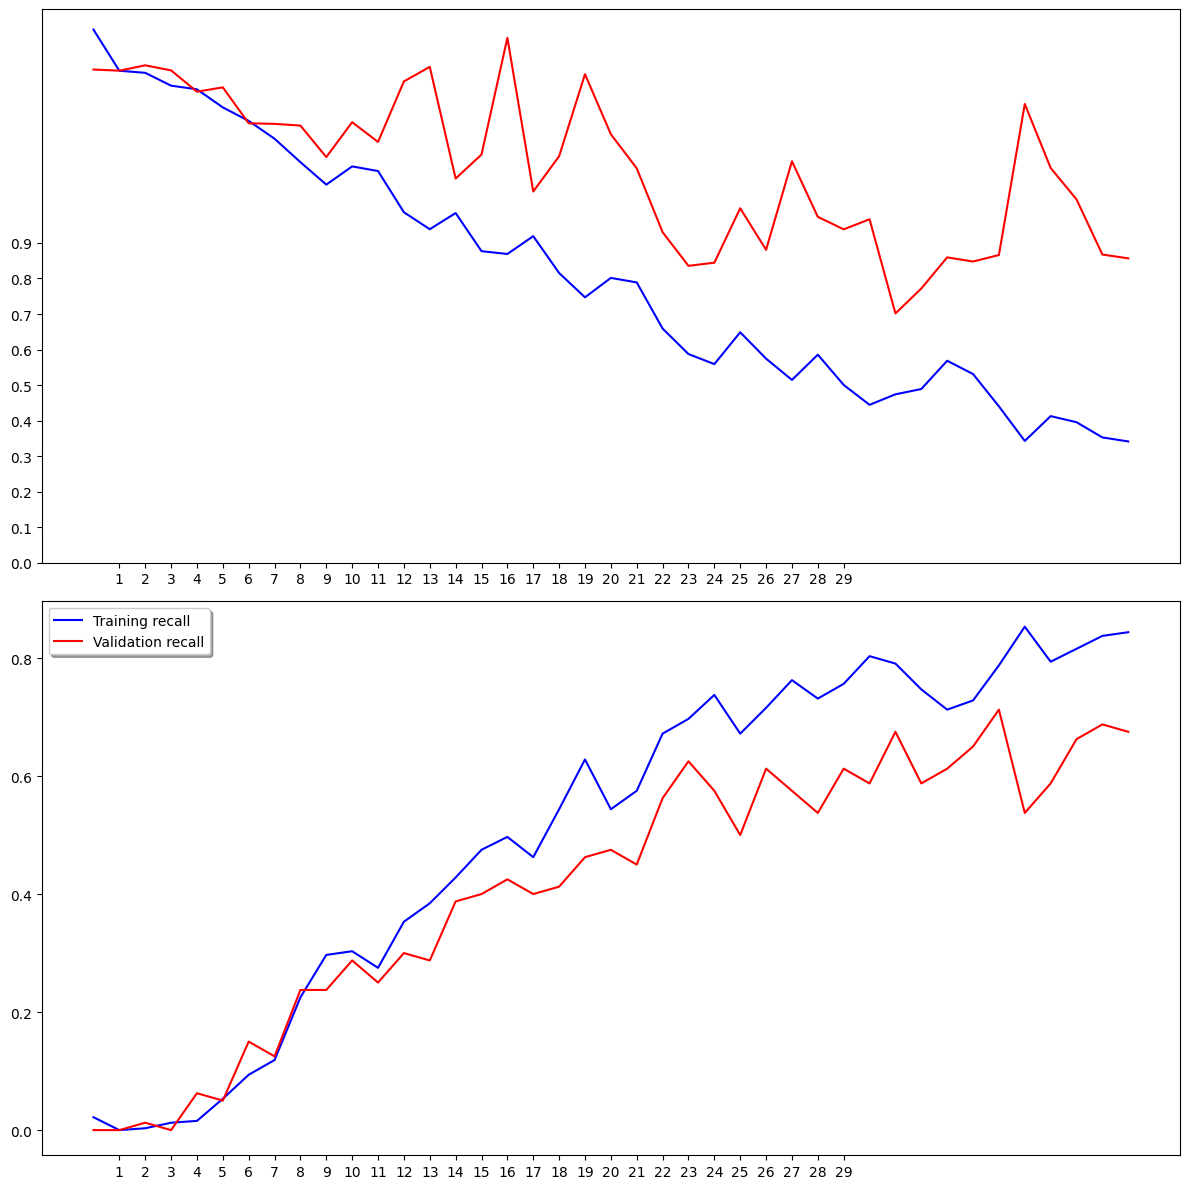

In [261]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 30, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['recall'], color='b', label="Training recall")
ax2.plot(history.history['val_recall'], color='r',label="Validation recall")
ax2.set_xticks(np.arange(1, 30, 1))

plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()